
 Co-occurence matrix : 

[1.0, 0.027, 0.0, 0.092, 0.0]
[0.027, 1.0, 0.0, 0.154, 0.135]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.092, 0.154, 0.0, 1.0, 0.351]
[0.0, 0.135, 0.0, 0.351, 1.0]

 Heatmap : 


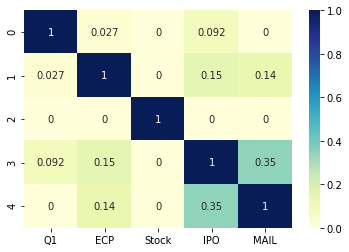


 Network : 


D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibD

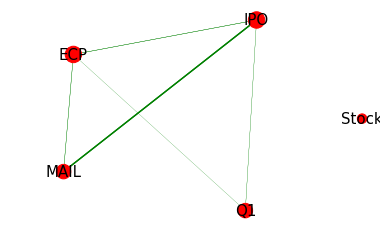

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 20:06:39 2019

@author: Dennis
"""
import pandas as pd
import jieba
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sn
from math import pow


max_node = 300
min_node = 30
font_size = 15
node_color = 'r'

''' Words '''
df = pd.read_csv('customerService.csv')   # file
dflist = df["客戶事件描述"]

data=[]
for i in dflist:
    temp1=jieba.cut(i.replace(' ',','), cut_all=False)
    temp2=[]
    for j in temp1:
        temp2.append(str(j))
    data.append(temp2)

#print(data)
#print()
#
#


''' Rule base // NER '''
# rb
rb = ['Q1', 'ECP', 'Stock', 'IPO' ,'MAIL']   # test graph 
# chinese nodes
# NER


''' TDM // Co-occurence matrix '''
d_vs_rb = []   #  data vs rule base
for client in data:
    show = []
    for i in rb:  
        ct = 0
        for j in client:
            if(j == i):
                ct = ct +1
        show.append(ct)
    d_vs_rb.append(show)

co_o=[]   # Co-occurence 
for i in range(len(rb)):
    temp=[]
    for j in range(len(rb)):
        summ,x2,y2 = 0,0,0   # Cosine Normalization 
        for s in range(len(data)):
            summ = summ + d_vs_rb[s][i] * d_vs_rb[s][j] 
            x2 = x2 + pow(d_vs_rb[s][i],2)
            y2 = y2 + pow(d_vs_rb[s][j],2)
        normalize = pow(x2 * y2, 1/2)
        if(normalize == 0):
            temp.append(0)
        else:
            temp.append(round(summ / normalize ,3 ))
    co_o.append(temp)    
print("\n Co-occurence matrix : \n")  
for i in co_o:
    print(i)
# 
#


''' Graph // Heatmap // Network '''  
co = co_o # use real data 

# Heatmap
print("\n Heatmap : ")
df=pd.DataFrame(co_o , columns = rb )
sn.heatmap(df ,  annot=True , cmap='YlGnBu')   # opt - annot=True
plt.savefig('Heatmap.jpg')
plt.show()

G = nx.Graph()
# network    
for i in range(len(rb)):
    for j in range(len(rb)):
        G.add_edge(rb[i], rb[j])

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nodeSize=[]
for i in range(len(rb)):
    con = 0
    for j in range(len(rb)):
        if(co[i][j] != 0):          # co #
            con = con + 1
    nodeSize.append(max_node * (con / len(rb)) + min_node)
nx.draw_networkx_nodes(G, pos,nodelist = rb, node_size = nodeSize ,node_color = node_color)

# edges
for i in range(len(rb)):
    for j in range(len(rb)):
        if(co[i][j]!=0):            # co #
            nx.draw_networkx_edges(G, pos, 
                                   edgelist = [(rb[i],rb[j])],
                                   width = pow(co[i][j],2) * 10 + 0.1 ,
                                   edge_color = 'g')   # co #

# labels
nx.draw_networkx_labels(G, pos, font_size = font_size, font_family='sans-serif')

plt.axis('off')
print("\n Network : ")
plt.savefig('Network.jpg')
plt.show()
